# Kurze Einführung in Python

Diese Einführung fokusiert das wichtigste und ersetzt nicht weitere Unterlagen, wie zum Beispiel die auf der einführenden Seite verwiesenen Tutorials.

Ziel der Einführung in die Numerik ist der Fokus auf die

- mathematischen Ansätze
- numerische Umsetzung
- Algorithmik.

Es werden daher so wenig wie nötig Bibliotheksfunktionalität vorgestellt. Diese kann später leicht selber erarbeitet und mit dem vermittelten wissen erfolgreich angewandt werden.

Die beiden wichtigsten Unterschiede zu Matlab:

- **Der Index startet in Python bei 0.**
- Blöcke werden mit **":"** gestartet und mit **Space-Zeichen** eingerückt (es gibt kein "end").

## Python

- Die Markierung eines Blocks geschieht durch Einrücken.
- Index startet bei 0

### Listen

Listen erstellen:

In [1]:
liste = [1,2,3,4]

oder in einer **for-Schlaufe** mit **if-Abfrage**:

In [2]:
liste = []
for k in range(5):
    print('k=',k)
    if k < 3:
        liste.append(k)
    else:
        liste.append(-k)
liste

k= 0
k= 1
k= 2
k= 3
k= 4


[0, 1, 2, -3, -4]

Ein weiteres Beispiel: es kann auch über die Elemente iteriert werden

In [3]:
stringliste = ['erster String', 'zweiter String', 'dritter String']
for s in stringliste:
    print(s)

erster String
zweiter String
dritter String


hat man mehrere Listen, auf welche man zurückgreifen will, so können diese "gezippt" werden:

In [4]:
for s, k in zip(stringliste, liste):
    print('k='+str(k)+'\t'+s)

k=0	erster String
k=1	zweiter String
k=2	dritter String


Die kürzeste Liste definiert die Anzahl Durchgänge. Die Listen sind unterschiedlich lang, wie man im folgenden Tupel sieht.

In [5]:
(len(stringliste), len(liste))

(3, 5)

Tupel werden gerne für die Rückgabe von mehreren Element von Funktionen benutzt.

### Funktionen

Optionale Parameter werden am Schluss der Parameterliste aufgeführt.

In [6]:
def meineFunktion(x, n=5):
    y = []
    for k in range(n):
        y.append(x**k)
    return y

In [7]:
meineFunktion(2)

[1, 2, 4, 8, 16]

In [8]:
meineFunktion(2,3)

[1, 2, 4]

oder

In [9]:
meineFunktion(2,n=4)

[1, 2, 4, 8]

## Numpy

Wir starten direkt mit NumPy. Der klassische Import (defacto Standard in der Notation 'np') des Moduls geschieht mit Hilfe des Befehls:

In [10]:
import numpy as np

Das Rechnen mit Matrizen, Vektoren etc. werden wir mit Hilfe der numpy.ndarray Klasse durchführen. Das Initialisieren geschieht mit Hilfe einer Liste: 

### Vektoren

In [11]:
x = np.array([1,2])

In [12]:
type(x)

numpy.ndarray

oder evtl. etwas flexibler:

In [13]:
x = np.array([i**2 for i in range(5)])
print(x)

[ 0  1  4  9 16]


Elementweise Operationen +, -, *, /, etc. können direkt benutzt werden

In [14]:
x*x

array([  0,   1,  16,  81, 256])

In [15]:
x+x

array([ 0,  2,  8, 18, 32])

In [16]:
(np.sin(x)+np.exp(x))*x

array([0.00000000e+00, 3.55975281e+00, 2.15365390e+02, 7.29314644e+04,
       1.42177764e+08])

### Matrizen

Für Matrizen benutzen wir ebenfalls die numpy.ndarray Klasse. Das ist bedeutend flexibler als die abgeleitete Matrix Klasse.

In [17]:
A = np.ones((5,5))

In [18]:
A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Elementweise Operationen können wieder direkt durchgeführt werden:

In [19]:
5*A

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

In [20]:
np.sin(A)

array([[0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098]])

Der Zugriff auf die Elemente geschieht wie folgt:

In [21]:
A[0,0]

1.0

In [22]:
A[1,3] = 5

In [23]:
A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 5., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Matrix Multiplikation

Zur Erinnerung: x ist ein Zeilenvektor, daher erhalten wir wieder einen Zeilenvektor.

In [24]:
A@x

array([30., 66., 30., 30., 30.])

äquivalent

In [25]:
A.dot(x)

array([30., 66., 30., 30., 30.])

oder als Spaltenvektor

In [26]:
x1 = x.reshape((5,1))
x1

array([[ 0],
       [ 1],
       [ 4],
       [ 9],
       [16]])

In [27]:
A@x1

array([[30.],
       [66.],
       [30.],
       [30.],
       [30.]])

Mit Hilfe von 'fancy indexing' kann auch Teilmengen eines Arrays zugegriffen werden. Im folgenden Beispiel erstellen wir ein Array mit Zahlen zwischen -2 und 2, berechnen das Quadrat dieser und wählen wie Werte grösser als 1:

In [28]:
x = np.linspace(-2,2,50) # 100 Werte zwischen -2 und 2
y = x**2 # Elementweise quadrieren
ind = y>1
ind

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [29]:
y[ind]

array([4.        , 3.68013328, 3.37359434, 3.08038317, 2.80049979,
       2.53394419, 2.28071637, 2.04081633, 1.81424406, 1.60099958,
       1.40108288, 1.21449396, 1.04123282, 1.04123282, 1.21449396,
       1.40108288, 1.60099958, 1.81424406, 2.04081633, 2.28071637,
       2.53394419, 2.80049979, 3.08038317, 3.37359434, 3.68013328,
       4.        ])

Die zugehörigen $x$ Werte sind gegeben durch:

In [30]:
x[ind]

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816,  1.02040816,  1.10204082,
        1.18367347,  1.26530612,  1.34693878,  1.42857143,  1.51020408,
        1.59183673,  1.67346939,  1.75510204,  1.83673469,  1.91836735,
        2.        ])

## Matplotlib

Die Matplotlib beinhaltet eine sehr ähnliche Notation und Funktionalität wie Matlab. Viele Beispiele sind auf der Website von Matplotlib zu finden.



In [31]:
import matplotlib.pyplot as plt

Visualisieren wir obiges Beispiel mit 'fancy indexing':

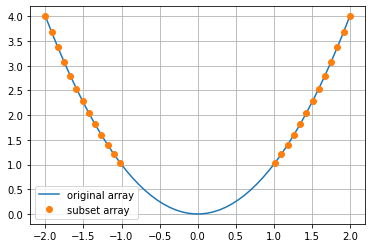

In [32]:
plt.plot(x,y,label='original array')
plt.plot(x[ind],y[ind],'o',label='subset array')
plt.legend()
plt.grid()
plt.show()

Viele Methoden aus Matlab sind in NumPy und matplotlib unter gleichem Namen verfügbar.

In [33]:
x = np.linspace(0,2*np.pi,200) # erzeugt 200 Punkte im Intervall [0,2pi]
                               # Kommentar mit #-Zeichen

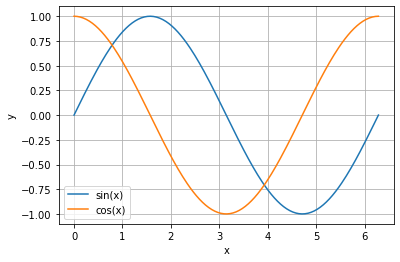

In [34]:
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.cos(x),label='cos(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Performance

Skript Programmiersprachen sind sehr flexibel und beliebt. Es muss jedoch zwingend im Bereich des wissenschaftlichen Rechnens sorgfältig damit umgegangen werden. Loops mit viel Rechenaufwand müssen möglichst mit Hilfe der Bibliotheksfunktionalität und daher dem C++ Code ausgeführt werden.

**Beispiel**: Berechnung des Skalarprodukts eines grossen Vektors.

In [35]:
x = np.linspace(0,1,int(1e8))

In [36]:
x.shape

(100000000,)

Langsame - **verbotene** - Version:
(in Python noch ineffizienter als matlab!)

In [37]:
import time
start = time.time()
sum = 0;
for xi in x:
    sum += xi*xi;
end = time.time()
print('CPU-Time:', end-start,'seconds')
sum

CPU-Time: 19.128199100494385 seconds


33333333.499996684

**Schnell** im C++ Code:

In [38]:
x = np.linspace(0,1,int(1e9))

In [39]:
start = time.time()
x.dot(x)
end = time.time()
print('CPU-Time:', end-start,'seconds')

CPU-Time: 0.4200723171234131 seconds


Mit %timeit können Performancetests in python relativ einfach umgesetzt werden. Eine einmalige Durchführung bei kurzen Rechenzeiten liefert mehr die Interrupt Zeit als CPU-Zeit.

In [40]:
%timeit x.dot(x)

409 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
